In [1]:
import bn
import ocr_data
import numpy as np
from IPython.display import clear_output

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [10,7]
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['font.size'] = 19
matplotlib.rcParams['font.family'] = 'DejaVu Serif'
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams['errorbar.capsize'] = 3

In [3]:
hidden_sizes = [36,25]
hidden_layers = len(hidden_sizes)
in_size = ocr_data.in_size
out_size = ocr_data.out_size

In [4]:
s = bn.System()
input_neurons = [s.add_neuron(input=True) for i in range(in_size)]
hidden_neurons = []
output_neurons = [s.add_neuron(output=True) for i in range(out_size)]
last_layer = input_neurons
for i_hidden in range(hidden_layers):
    hidden_layer = [s.add_neuron() for i_inner in range(hidden_sizes[i_hidden])]
    hidden_neurons.append(hidden_layer)
    for neuron in hidden_layer:
        for last_neuron in last_layer:
            neuron.add_input(last_neuron)
    last_layer = hidden_layer
for neuron in output_neurons:
    for last_neuron in last_layer:
        neuron.add_input(last_neuron)
s.finalize()

In [5]:
print('IN: %i OUT: %i TOTAL: %i WEIGHTS: %i'%(in_size,out_size,len(s.neurons),np.sum([len(n.weights) for n in s.neurons])))

IN: 64 OUT: 25 TOTAL: 150 WEIGHTS: 3829


In [6]:
def batch(length=10):
    cases = []
    successes = []
    for true_out,input in ocr_data.tagged_data(length):
        guess_out,state = s.guess(input,return_state=True)
        if np.any(guess_out != true_out):
            successes.append(False)
            s.learn(state,true_out,scale=1.0,noise=None)
        else:
            successes.append(True)
    return cases,successes

In [7]:
while True:
    batch_size = 1000
    cases,successes = batch(batch_size)
    correct = np.count_nonzero(successes)
    print('batch accuracy',correct,'/',len(successes))
    if correct/len(successes) > 0.95:
        break

batch accuracy 56 / 1000
batch accuracy 103 / 1000
batch accuracy 173 / 1000
batch accuracy 236 / 1000
batch accuracy 308 / 1000
batch accuracy 357 / 1000
batch accuracy 387 / 1000
batch accuracy 508 / 1000
batch accuracy 547 / 1000
batch accuracy 601 / 1000
batch accuracy 613 / 1000
batch accuracy 634 / 1000
batch accuracy 624 / 1000
batch accuracy 648 / 1000
batch accuracy 645 / 1000
batch accuracy 703 / 1000
batch accuracy 699 / 1000
batch accuracy 649 / 1000
batch accuracy 672 / 1000
batch accuracy 658 / 1000
batch accuracy 687 / 1000
batch accuracy 673 / 1000
batch accuracy 690 / 1000
batch accuracy 723 / 1000
batch accuracy 724 / 1000
batch accuracy 768 / 1000
batch accuracy 721 / 1000
batch accuracy 733 / 1000
batch accuracy 722 / 1000
batch accuracy 735 / 1000
batch accuracy 733 / 1000
batch accuracy 742 / 1000
batch accuracy 727 / 1000
batch accuracy 727 / 1000
batch accuracy 753 / 1000
batch accuracy 704 / 1000
batch accuracy 756 / 1000
batch accuracy 776 / 1000
batch accurac

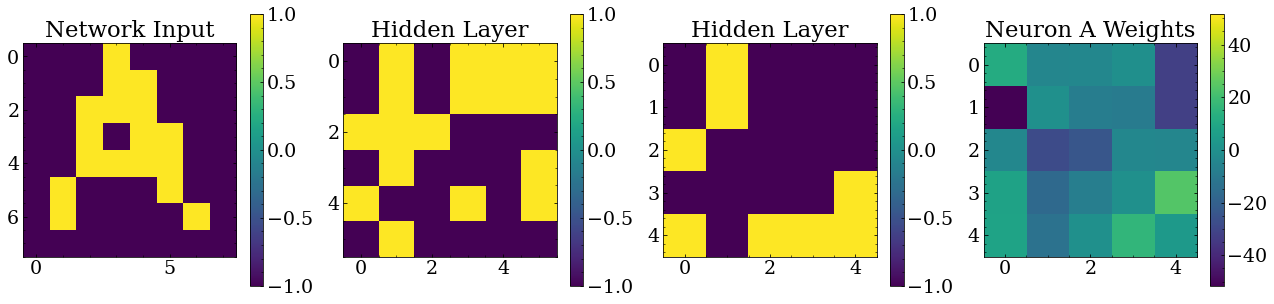

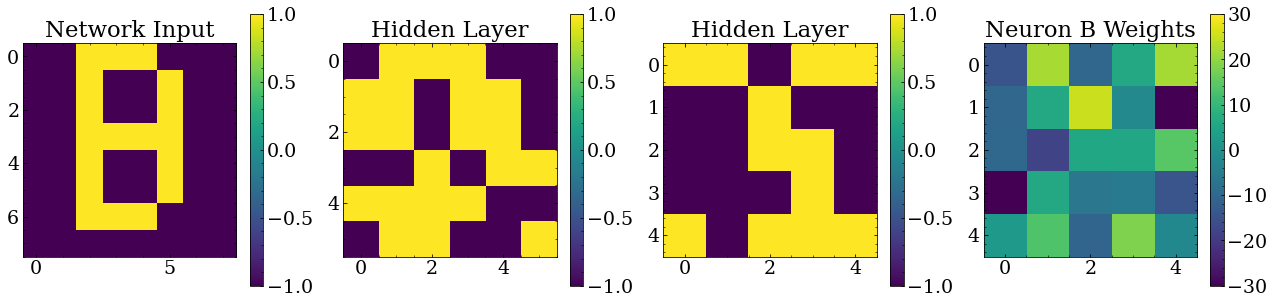

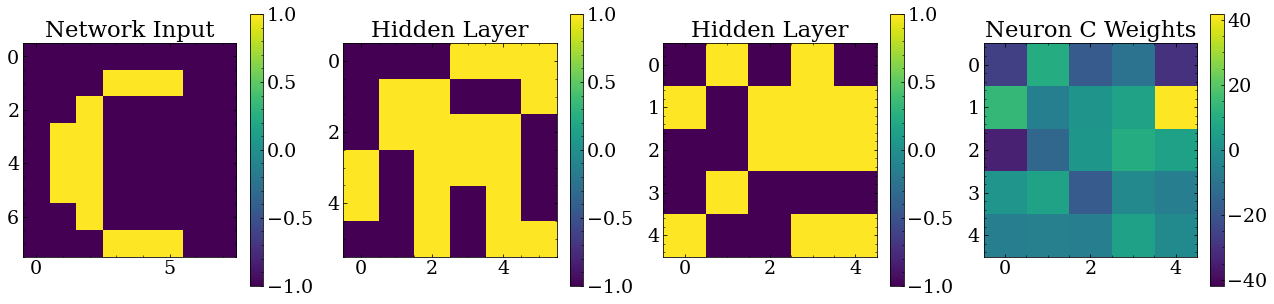

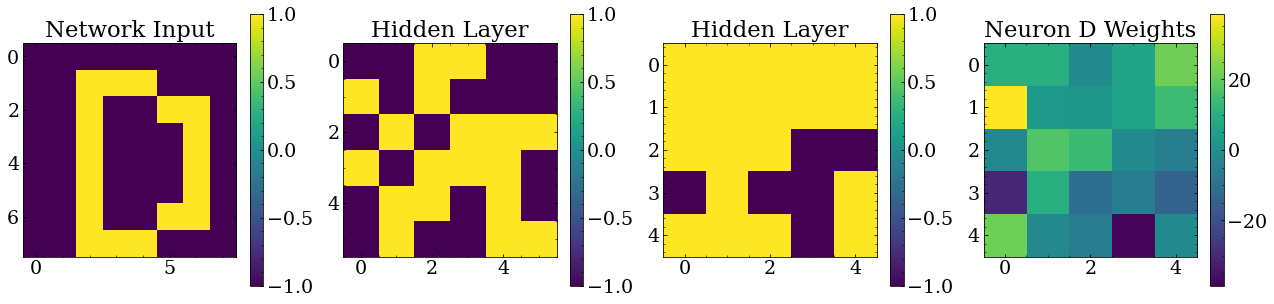

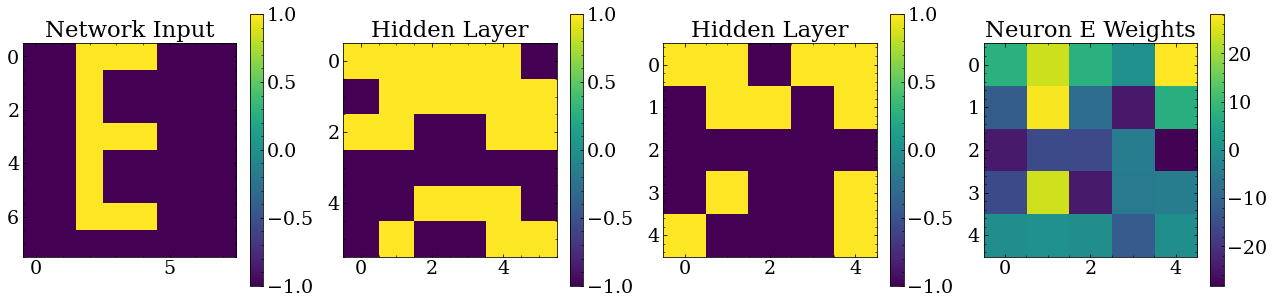

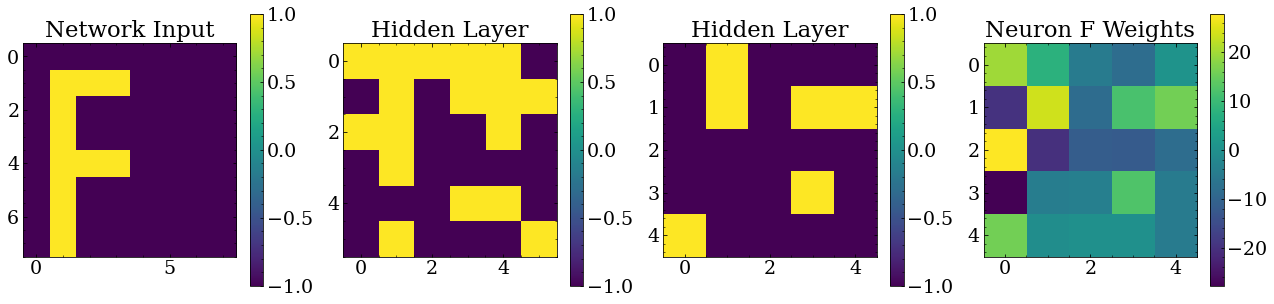

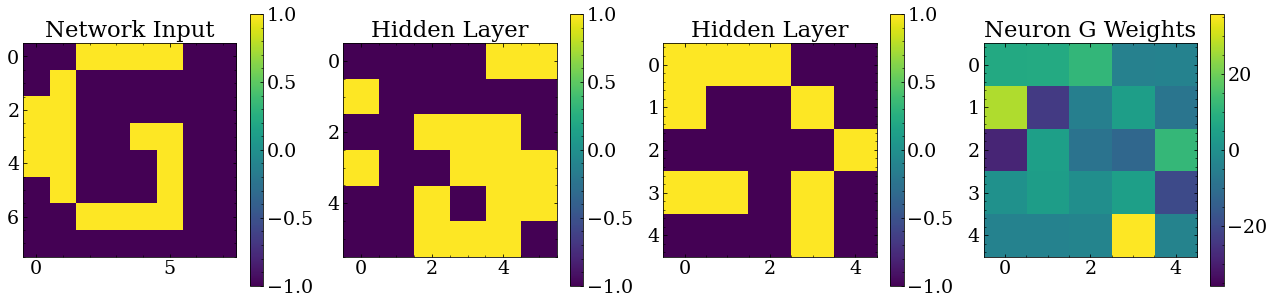

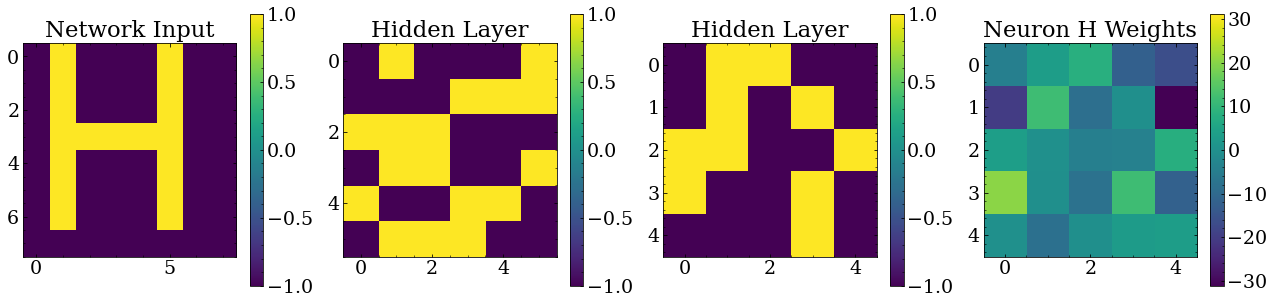

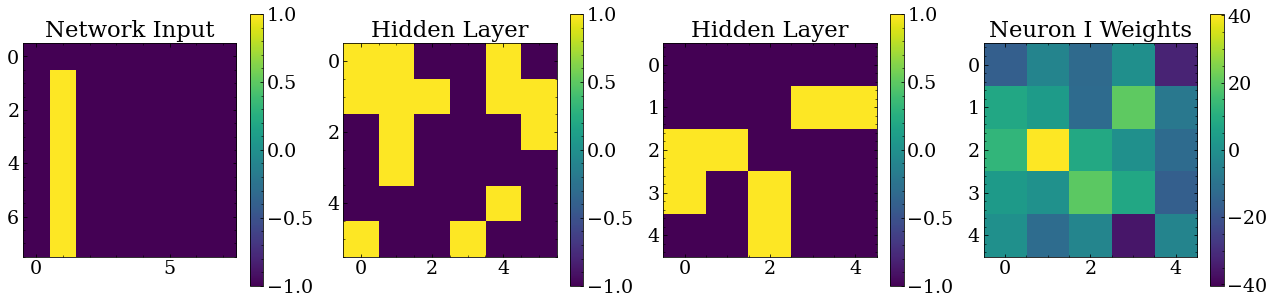

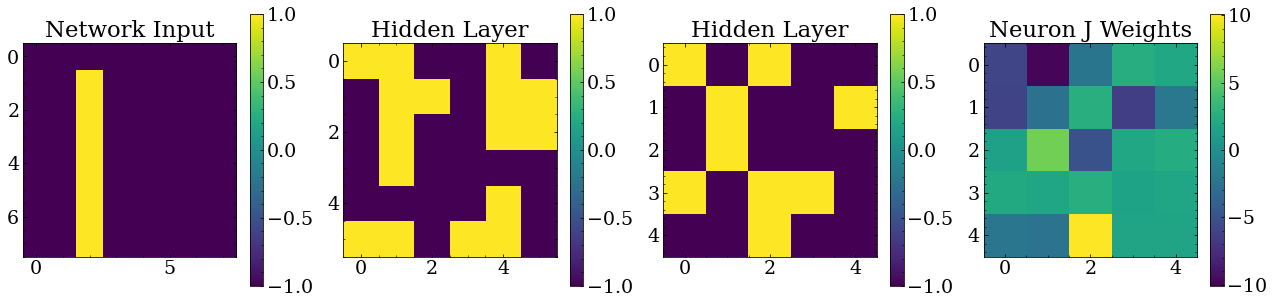

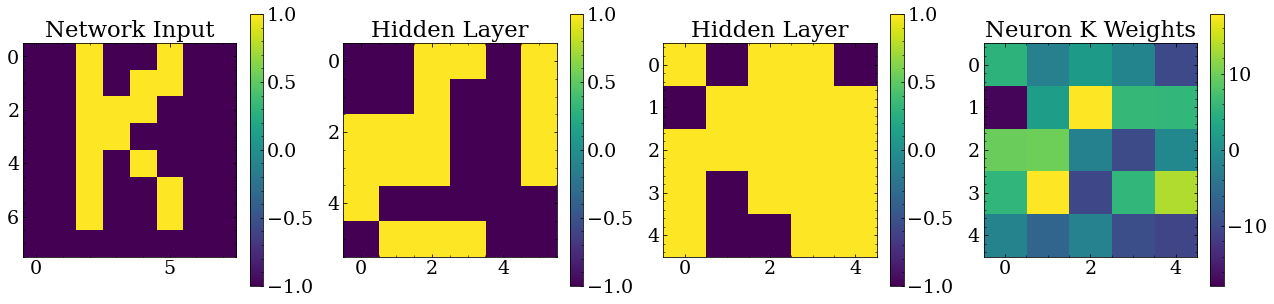

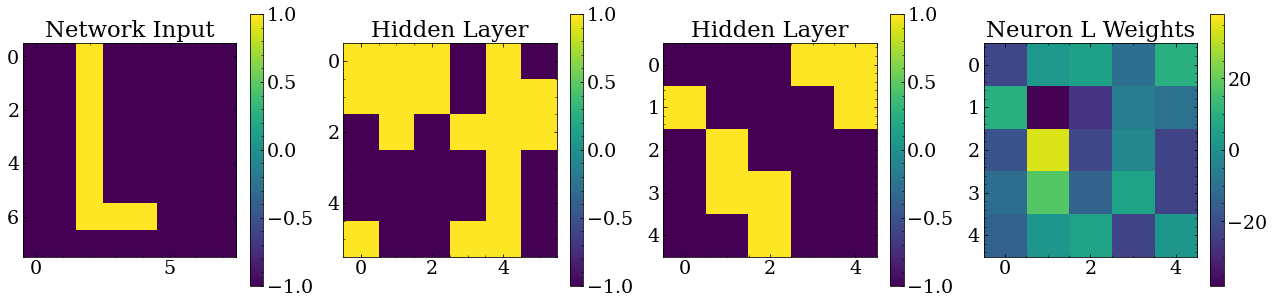

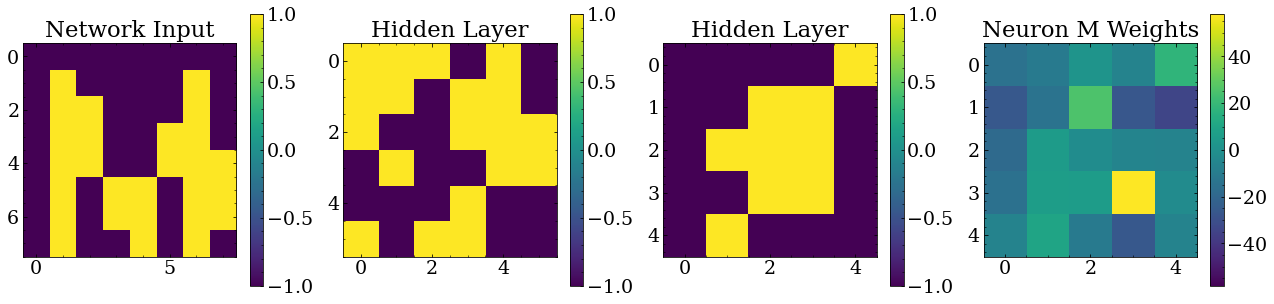

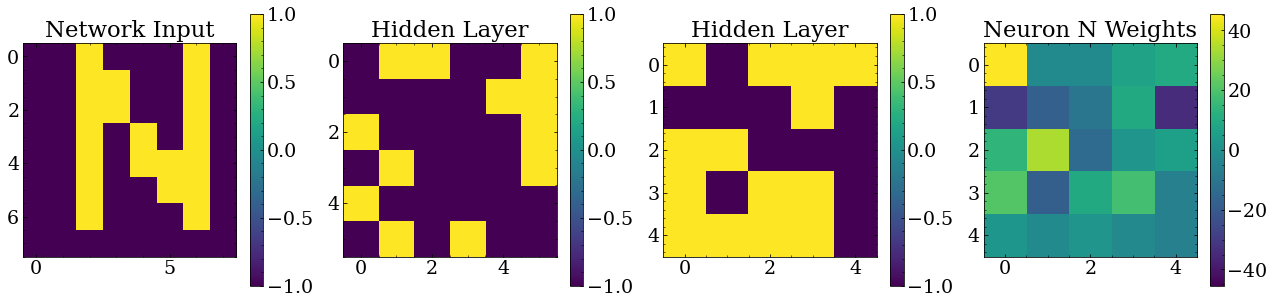

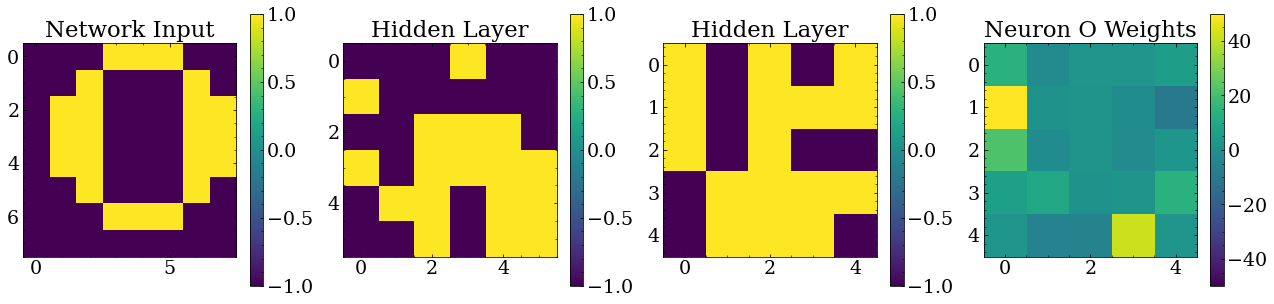

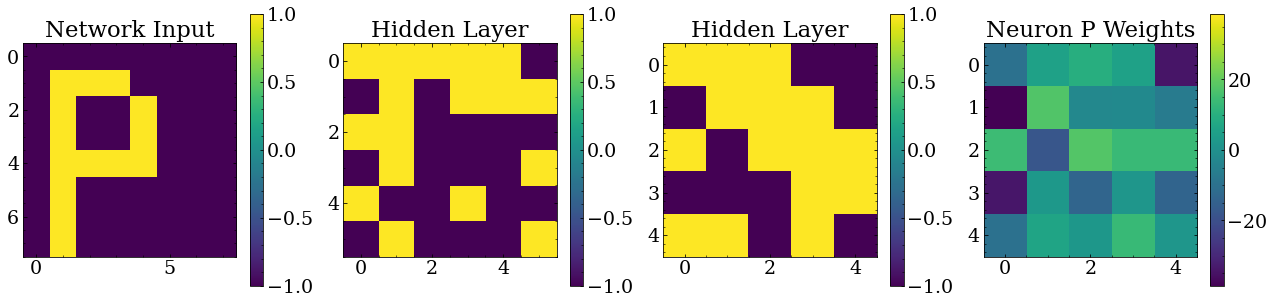

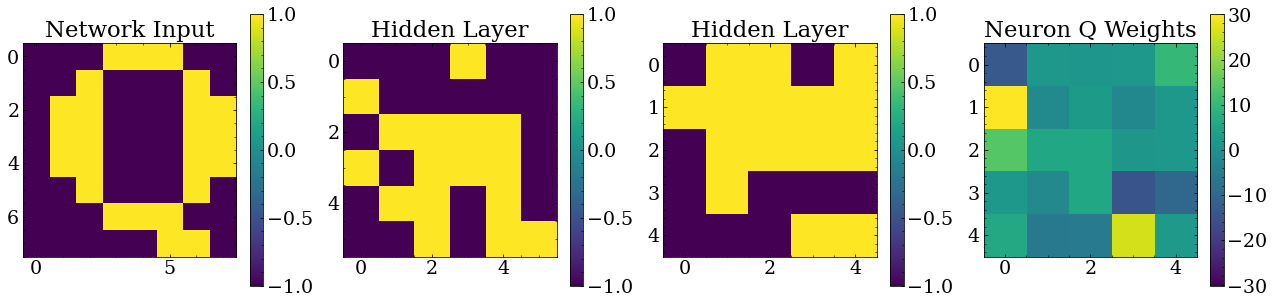

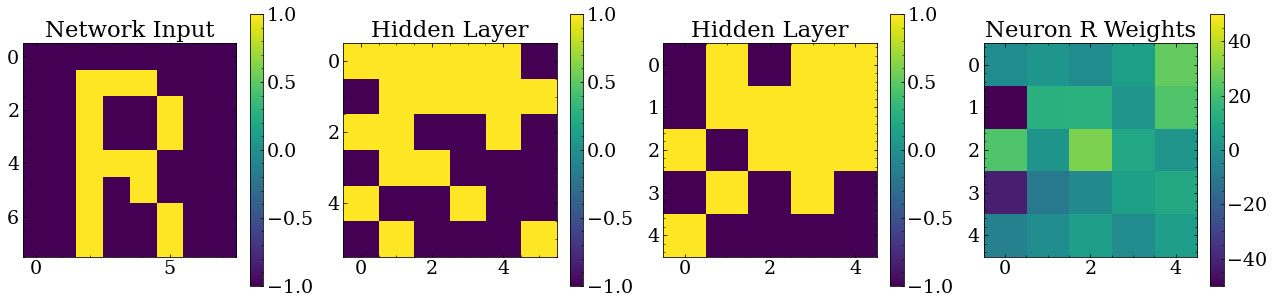

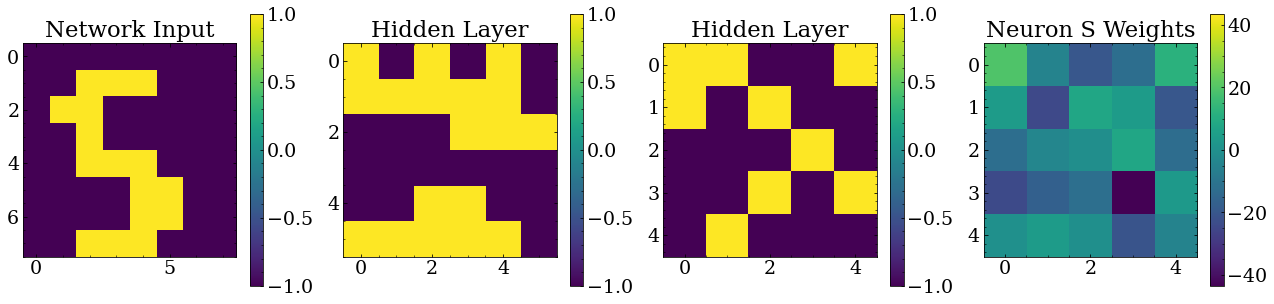

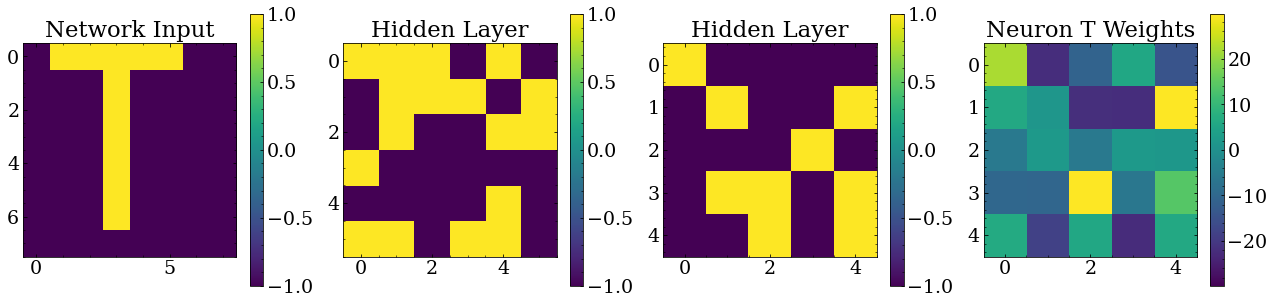

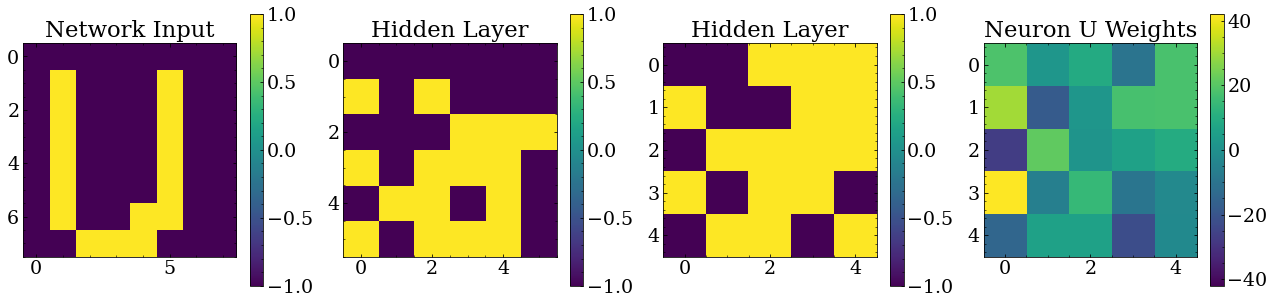

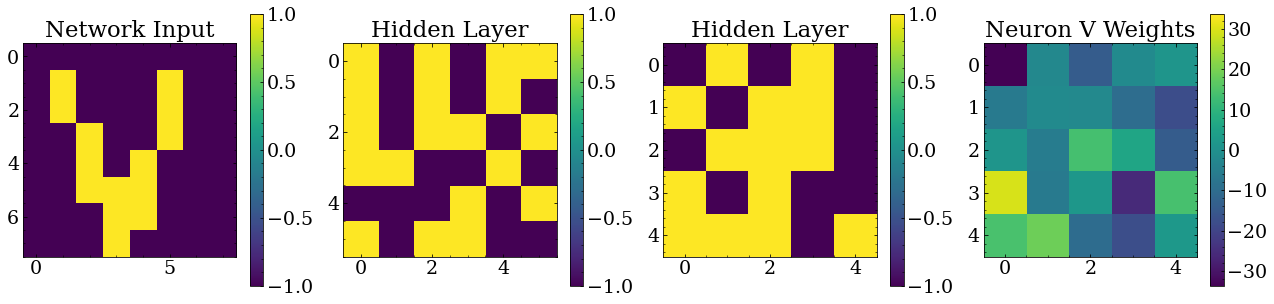

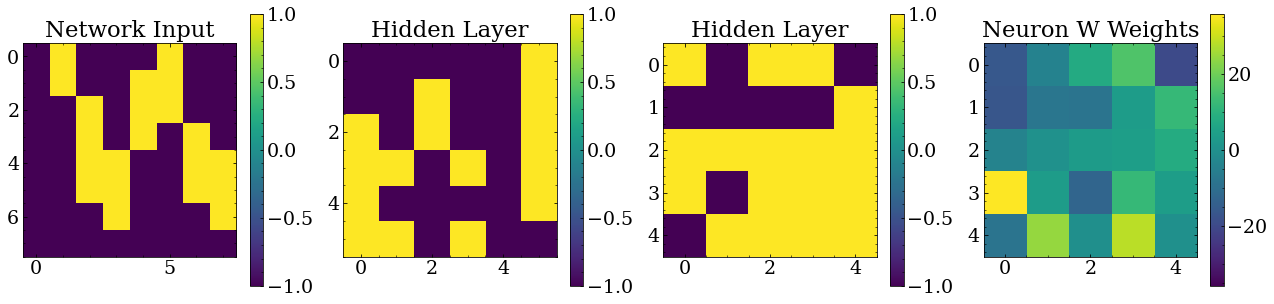

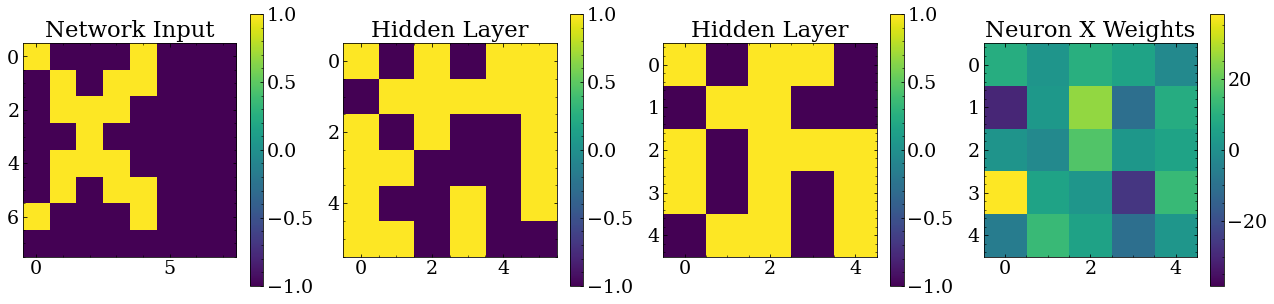

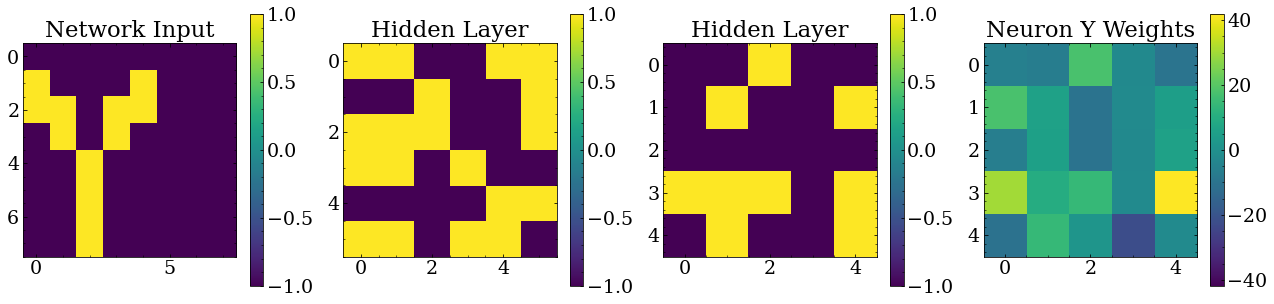

In [8]:
#to plot a simple one hidden layer network

from matplotlib.colors import Normalize

true_norm = Normalize(-1,1)
hidden_shapes = [(int(np.sqrt(l)),int(np.sqrt(l))) for l in hidden_sizes]

for i,iout in enumerate(s.outputs):
    letter = ocr_data.letters[i]
    test_in = ocr_data.gen_data(letter)[1]
    n = s.neurons[iout]
    sort = np.argsort(n.inputs)
    weights = n.weights[sort]
    pltmagic = 100 + 20 + hidden_layers*10
    
    plt.figure(figsize=[22,5])
    plt.subplot(pltmagic+1)
    plt.title('Network Input')
    plt.imshow(test_in,norm=true_norm)
    plt.colorbar()
    
    last_layer = test_in.flatten()
    for i in range(hidden_layers):
        last_layer = np.asarray([n.activate(last_layer,only_inputs=True) for n in hidden_neurons[i]])
        img_hidden = last_layer.reshape(hidden_shapes[i])
    
        plt.subplot(pltmagic+2+i)
        plt.title('Hidden Layer')
        plt.imshow(img_hidden)
        plt.colorbar()

    plt.subplot(pltmagic+2+hidden_layers)
    plt.title('Neuron ''%s'' Weights'%letter)
    img_weights = weights.reshape(hidden_shapes[-1])
    norm = np.max(np.abs(weights))
    weight_norm = Normalize(-norm,norm)
    plt.imshow(img_weights,norm=weight_norm)
    plt.colorbar()
    plt.show()
    plt.close()

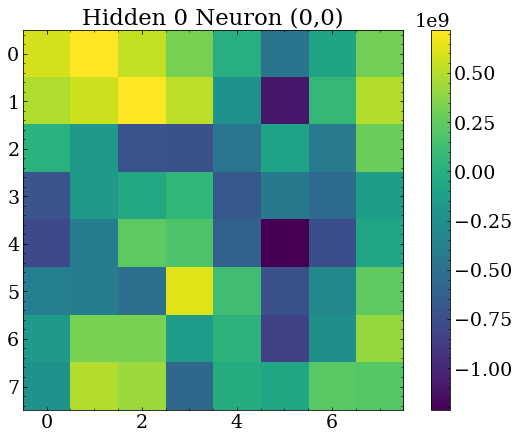

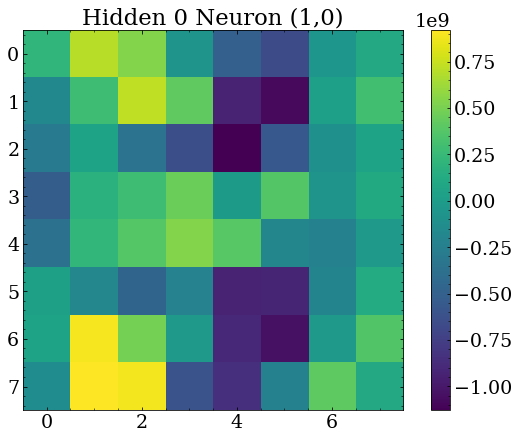

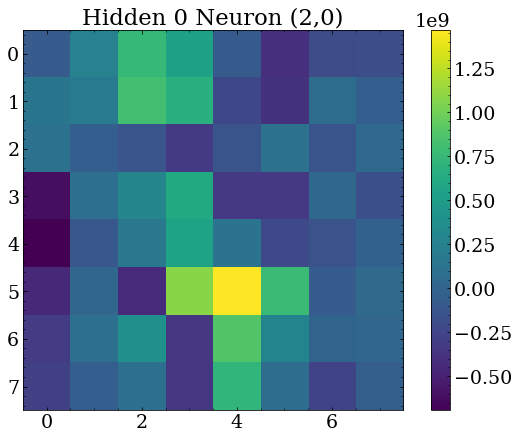

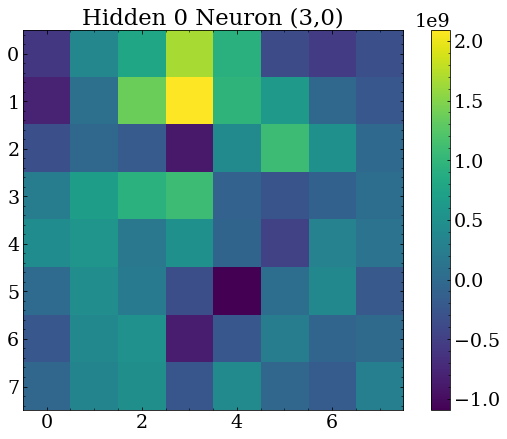

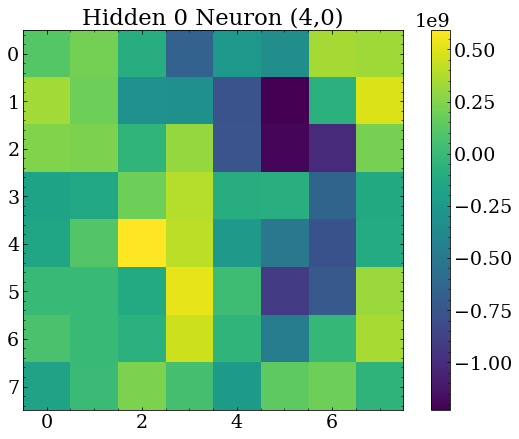

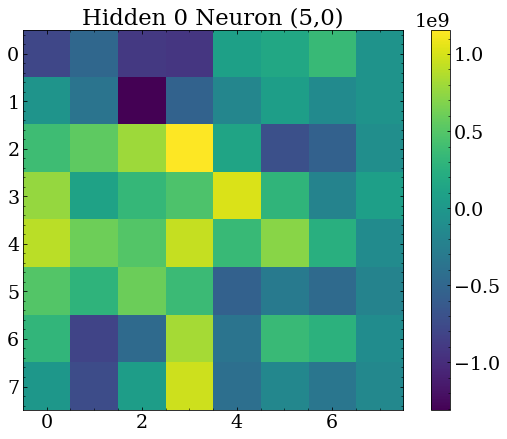

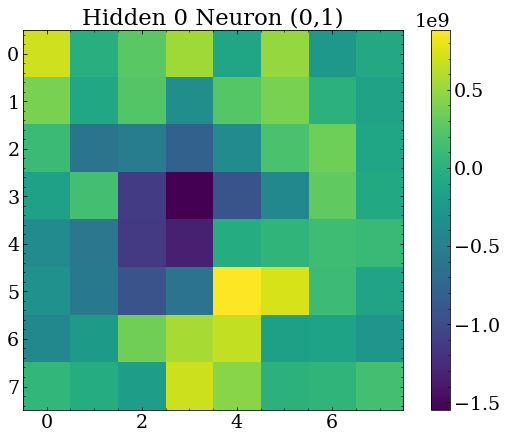

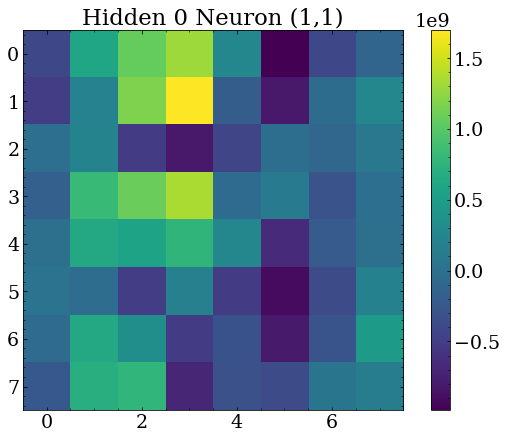

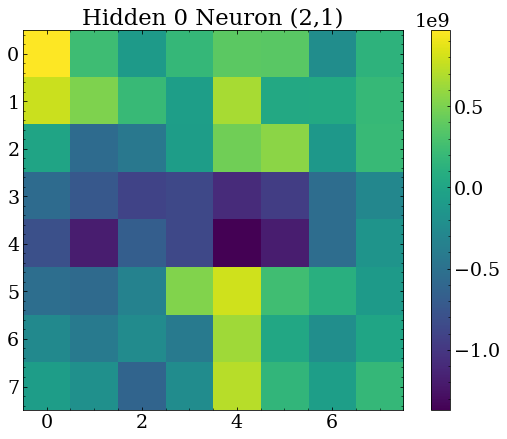

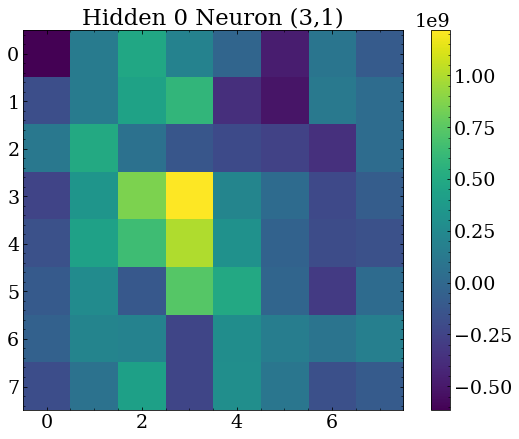

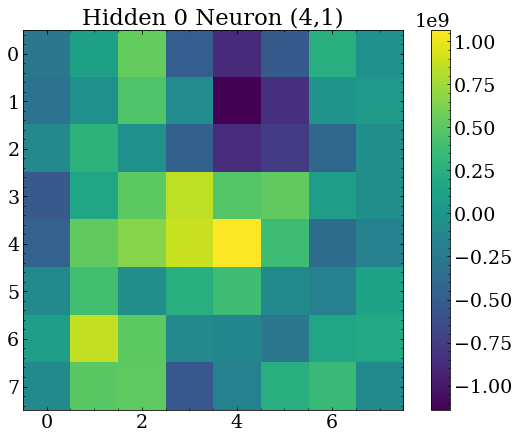

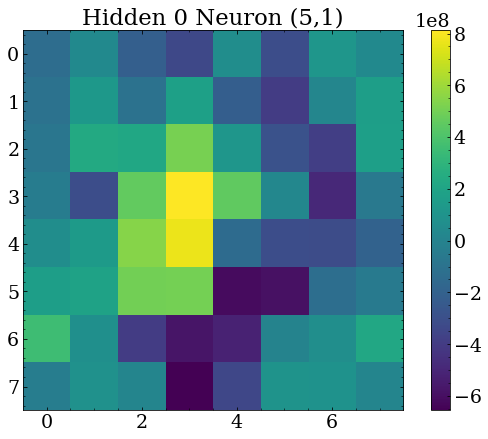

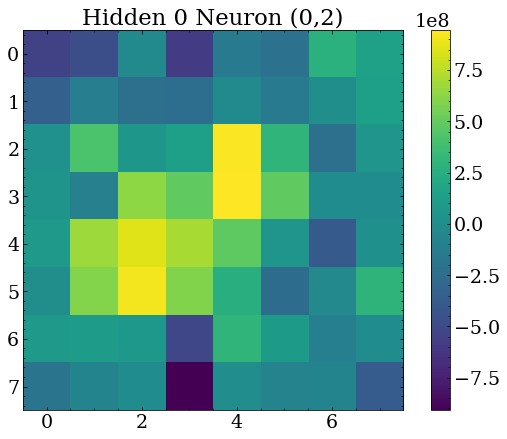

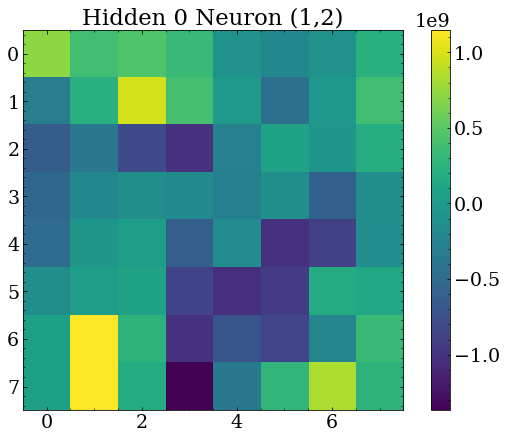

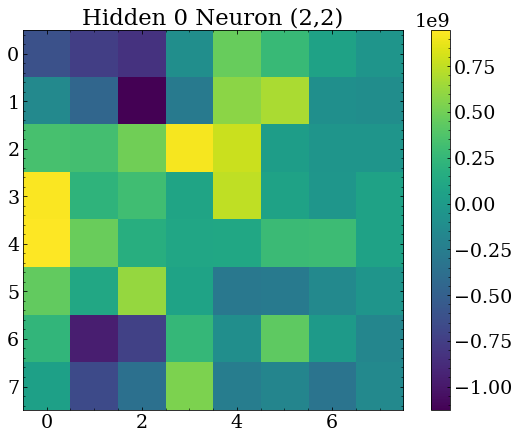

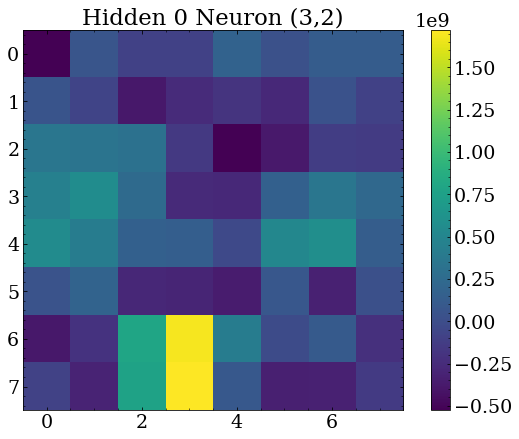

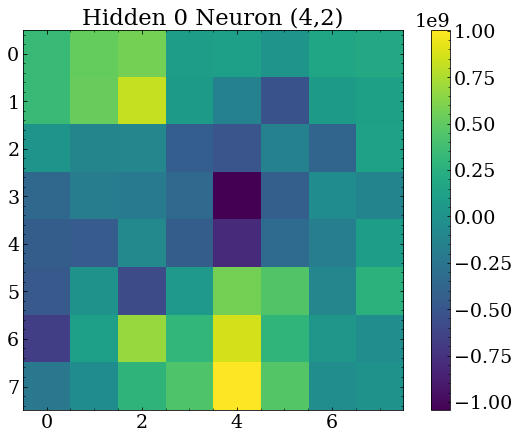

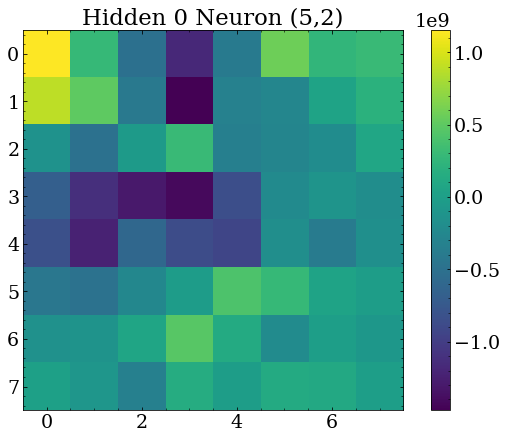

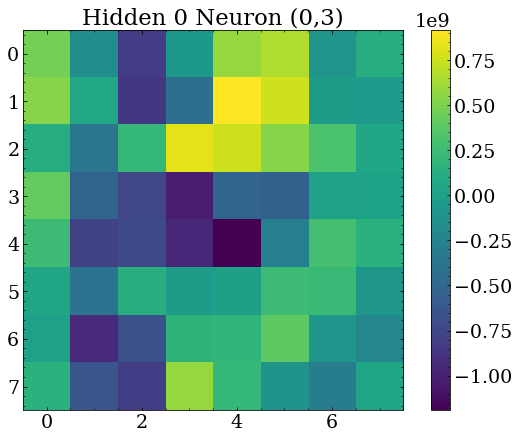

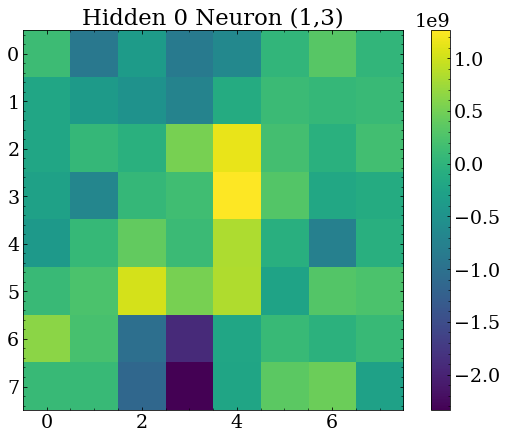

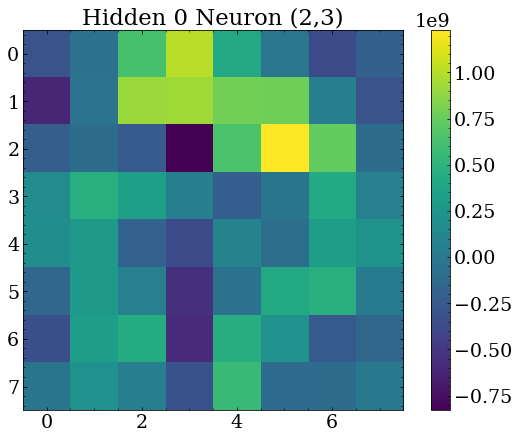

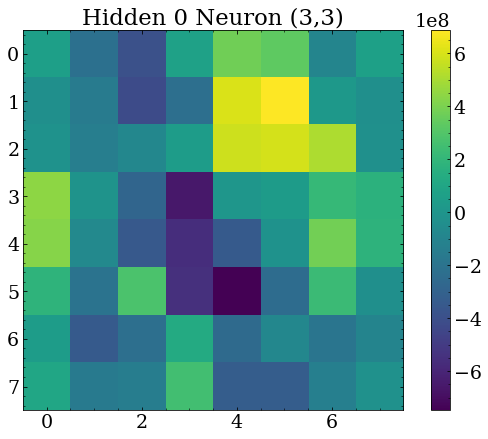

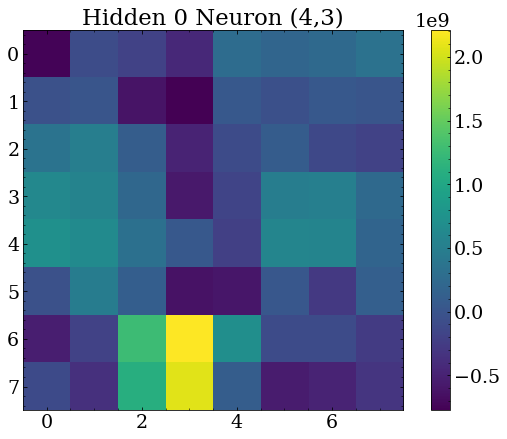

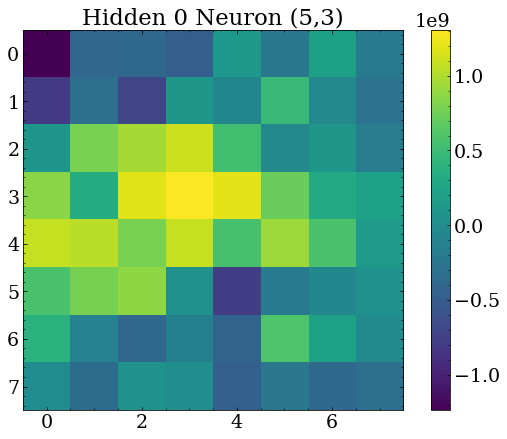

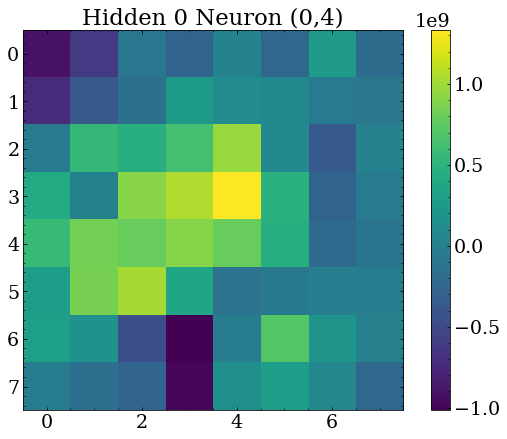

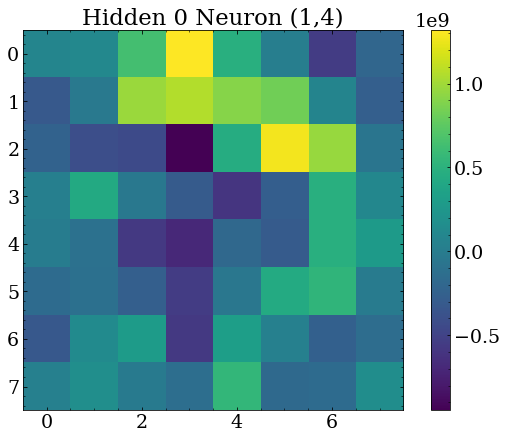

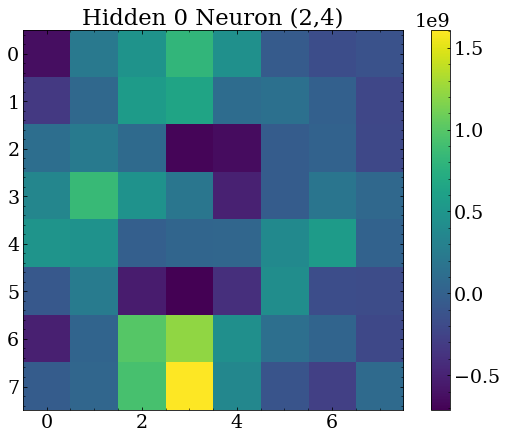

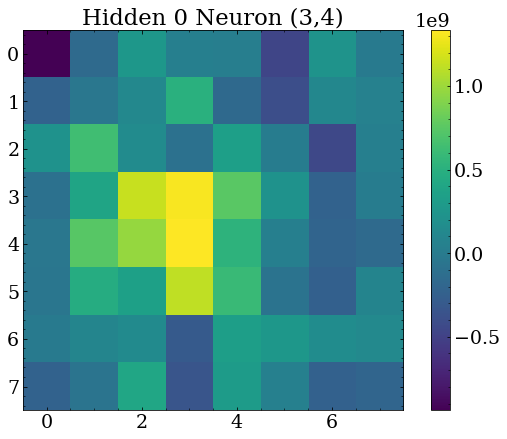

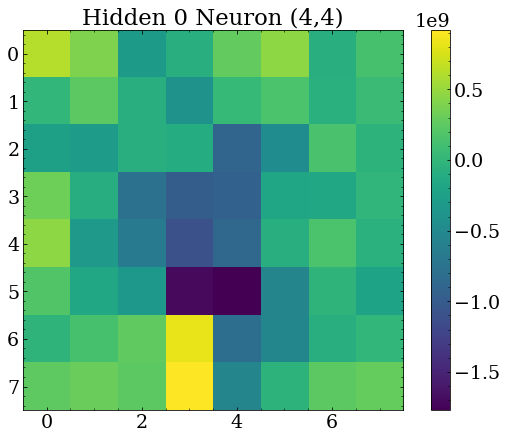

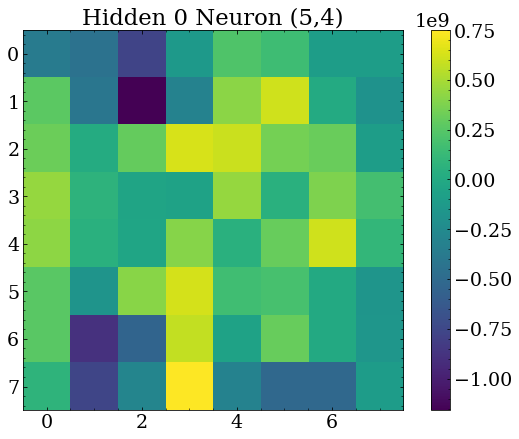

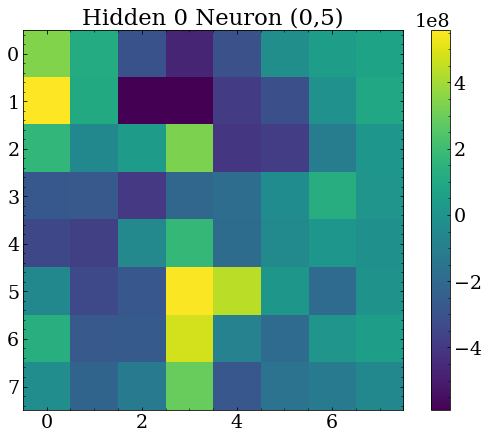

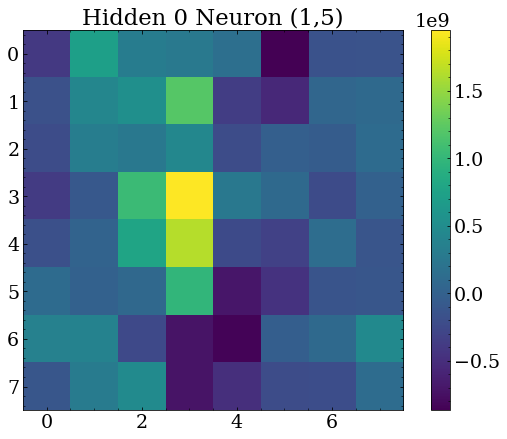

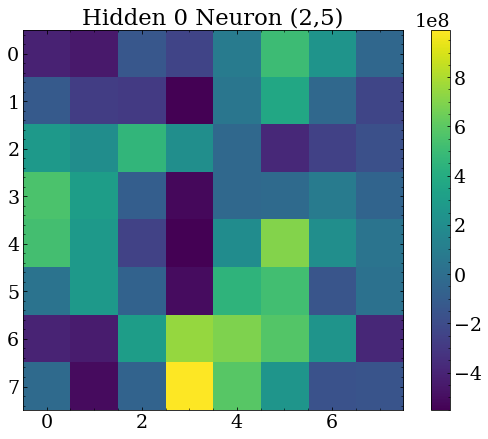

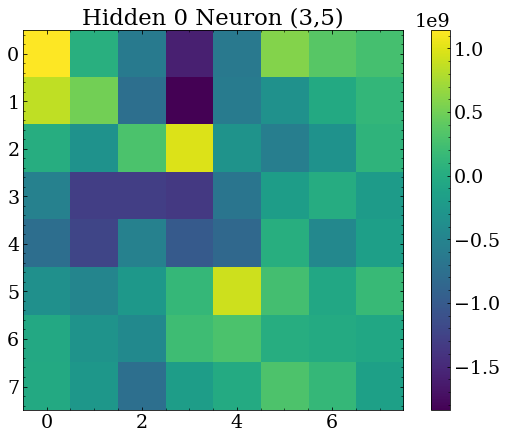

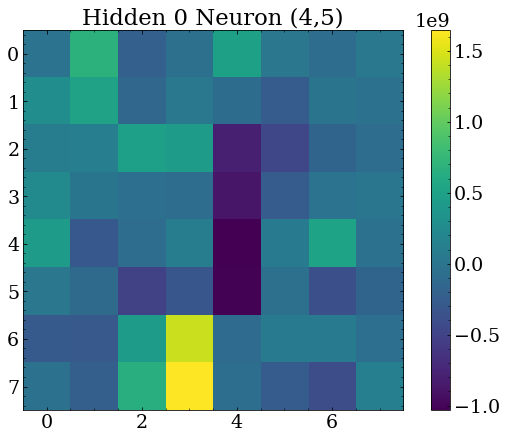

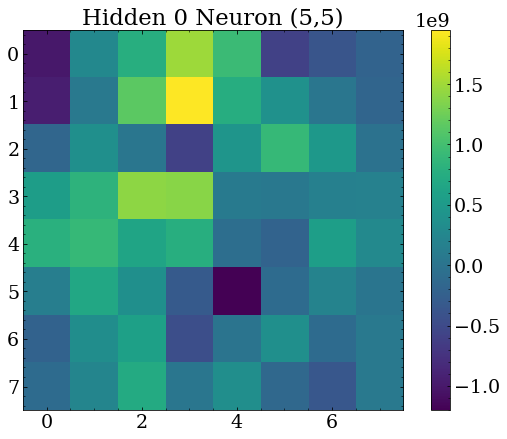

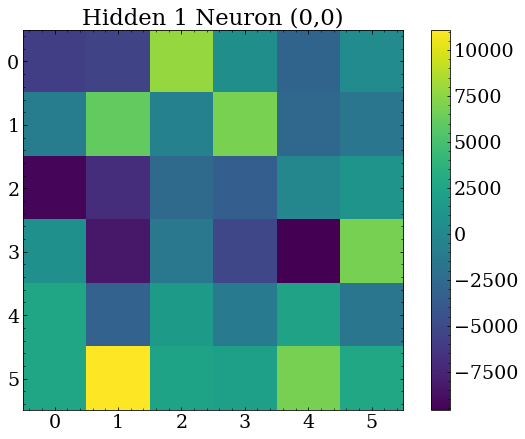

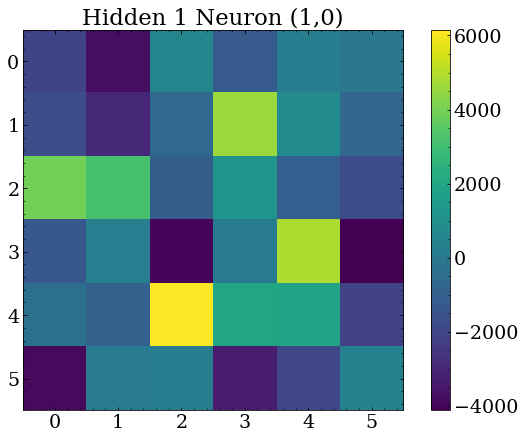

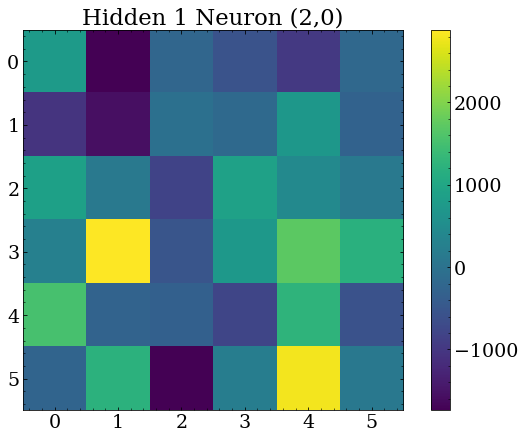

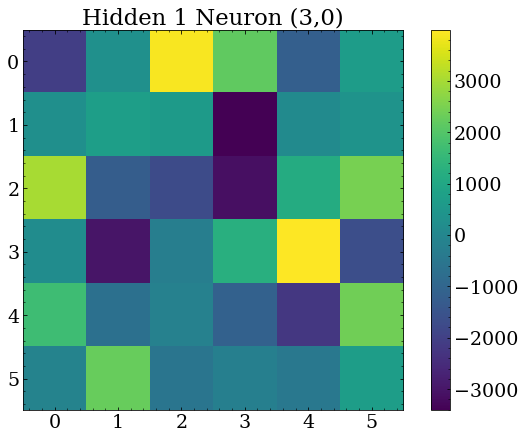

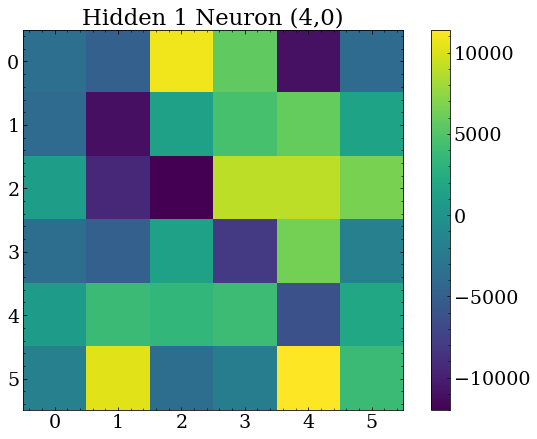

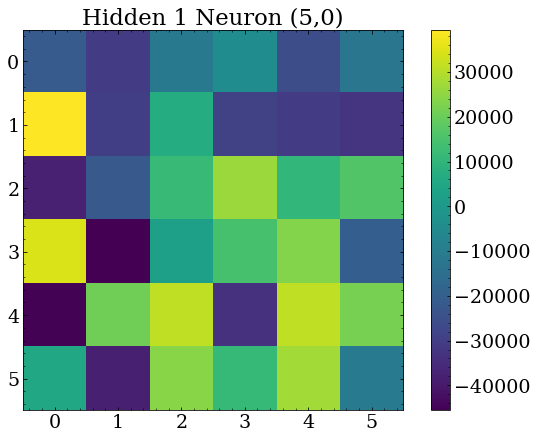

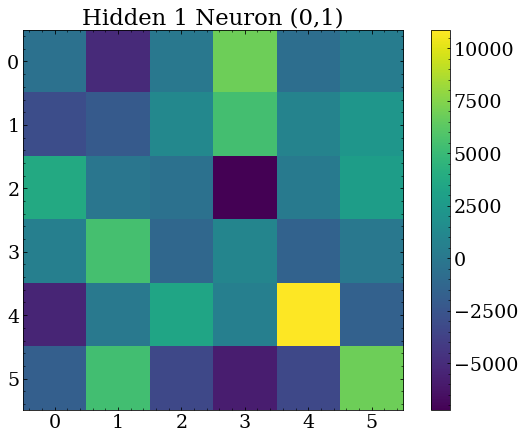

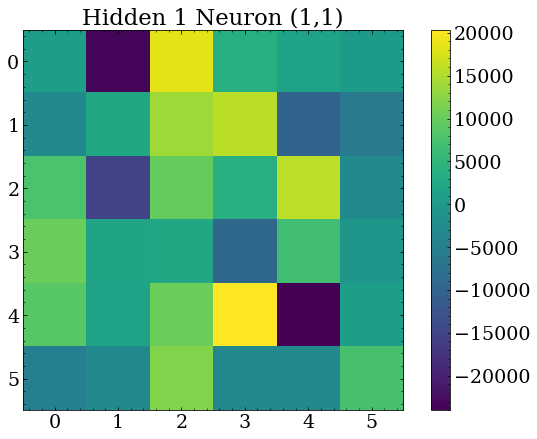

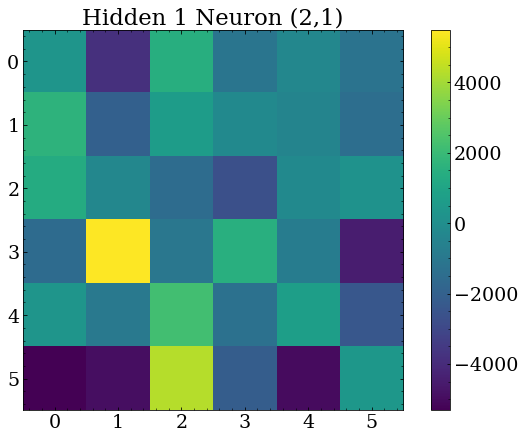

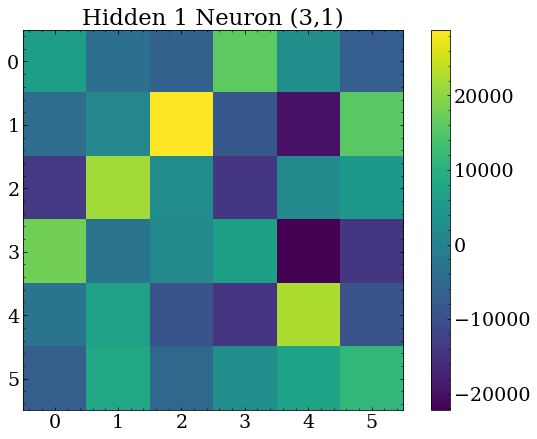

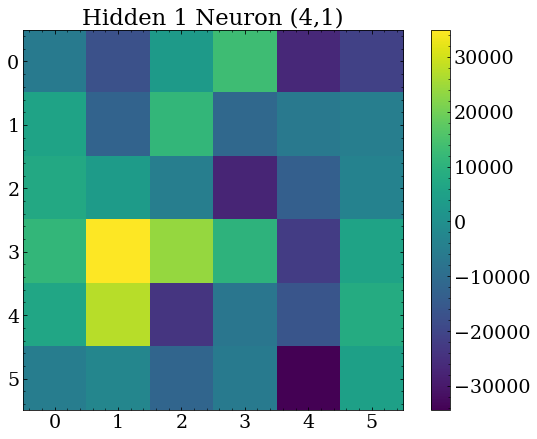

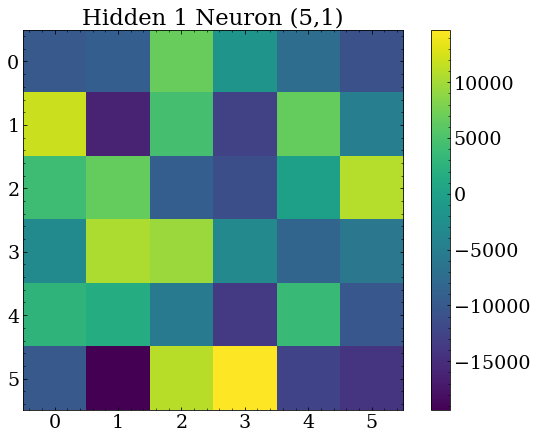

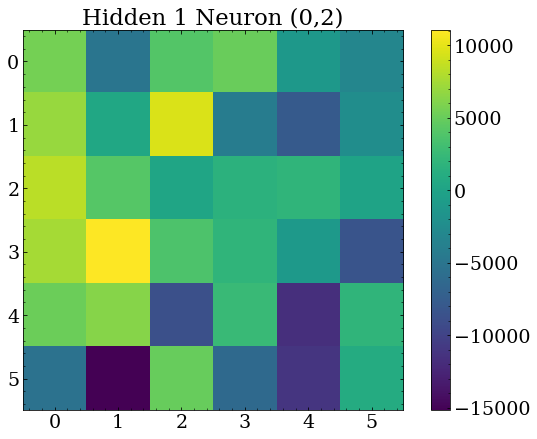

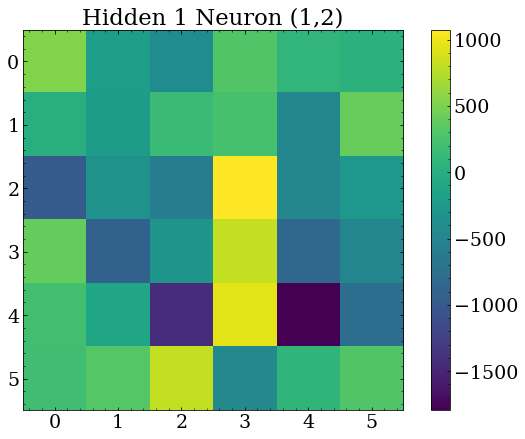

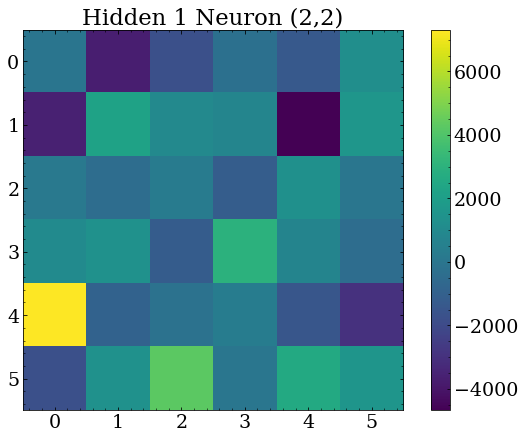

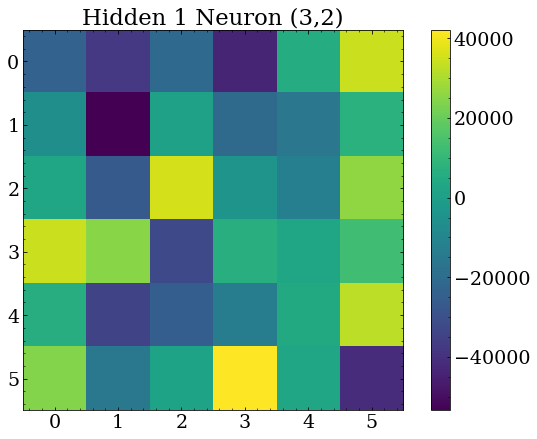

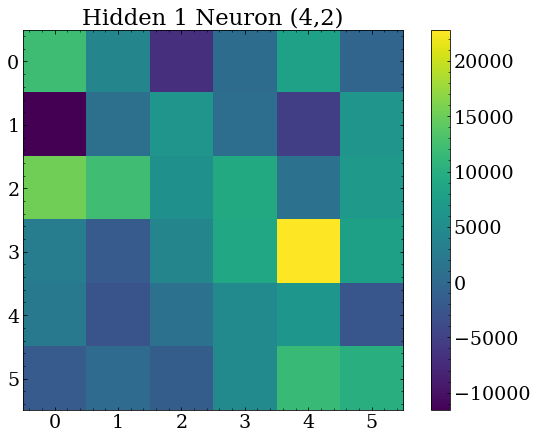

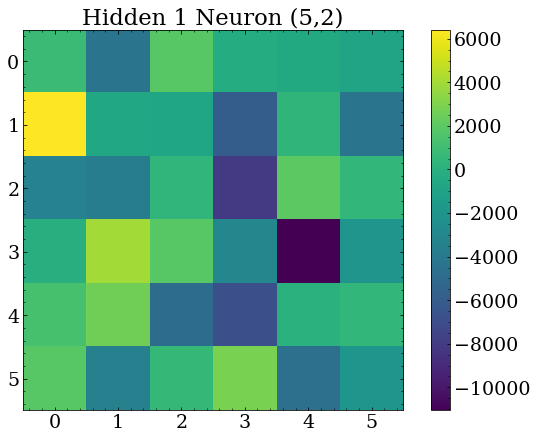

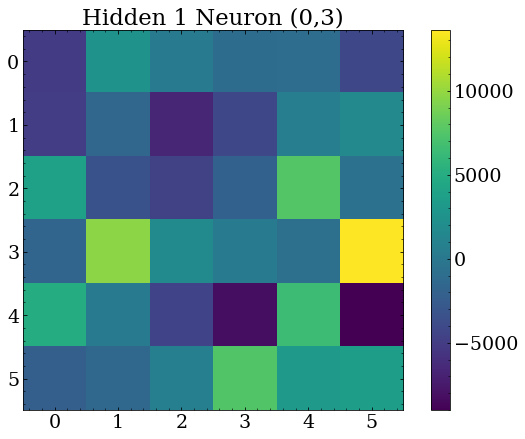

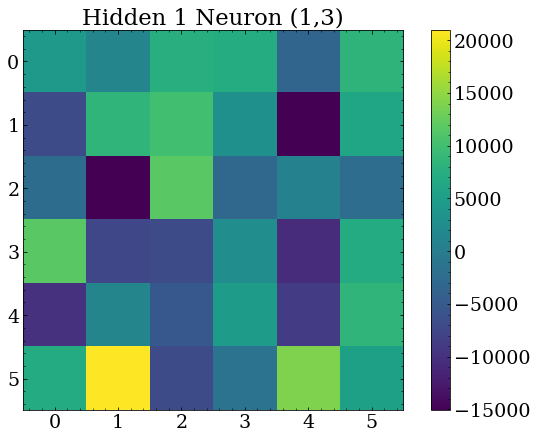

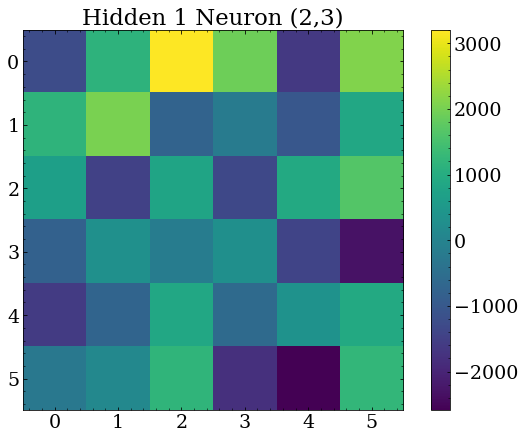

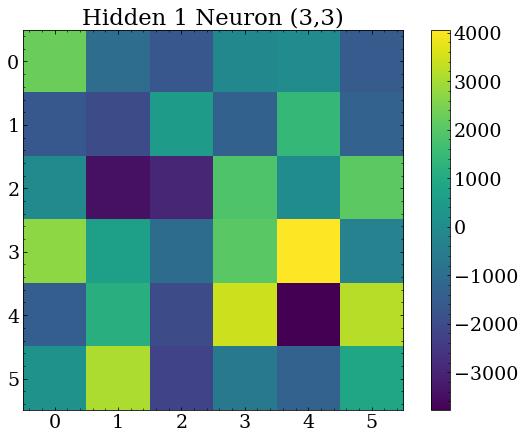

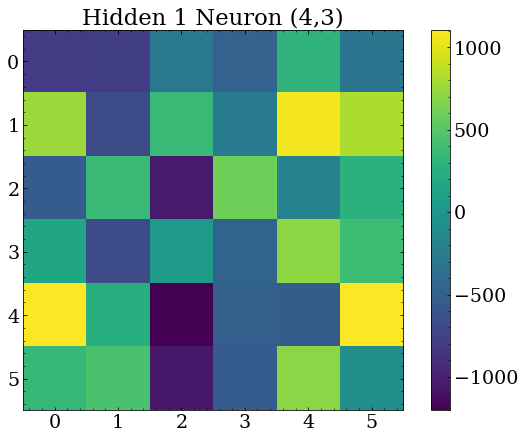

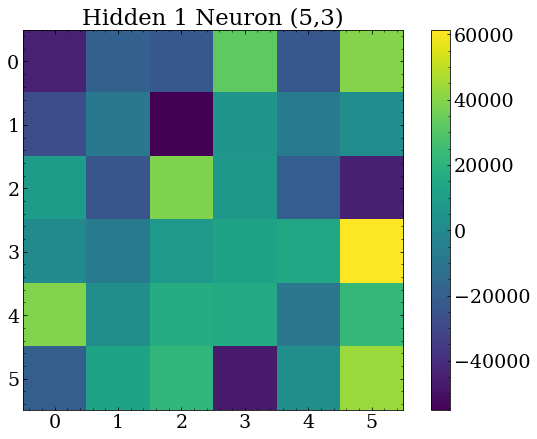

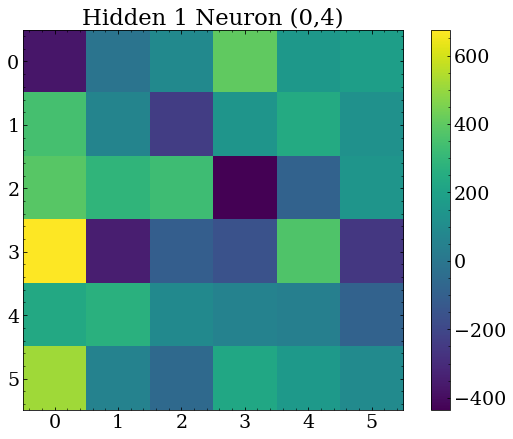

In [12]:
shapes = [(8,8),(6,6)]
for i in range(hidden_layers):
    for j,n in enumerate(hidden_neurons[i]):
        x = j % hidden_shapes[0][0]
        y = j // hidden_shapes[0][0]
        plt.figure()
        plt.title('Hidden %i Neuron (%i,%i)'%(i,x,y))
        plt.imshow(n.weights.reshape(shapes[i]))
        plt.colorbar()
        plt.show()
        plt.close()